<a href="https://colab.research.google.com/github/sherki99/Models-tensorflow/blob/main/Images_for_Weather_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Images for Weather Recognition
 
By providing images for any weather recognition project, this dataset helps classify images based on weather. It features a sum of 1125 images under categories such as sunny, cloudy, and rainy.



In [106]:
from google.colab import drive 
import os
# how to import dataset from kaggle without dolwand it
drive.mount("/content/drive") 
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
%cd /content/drive/MyDrive/Kaggle/
!kaggle datasets download -d jehanbhathena/weather-dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Kaggle
weather-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [107]:
# extractt zip file
import zipfile



local_zip = "weather-dataset.zip"
ref_zip = zipfile.ZipFile(local_zip, "r")
ref_zip.extractall()
ref_zip.close()



In [108]:
base_dir = "./dataset"
list_dir = os.listdir(base_dir)
# this varibaile contain th enumber of folderin the data set the number of type
n_type = len(list_dir)


dew_dir = os.path.join(base_dir, "dew")
list_dew  = os.listdir(dew_dir)
print("the size of dew image is " , len(list_dew))

fogsmog_dir= os.path.join(base_dir, "fogsmog")
list_fogsmog  = os.listdir(fogsmog_dir)
print("the size of fogsmow is " , len(list_dew))


train_size  = 0.8
size = int(len(list_dew) *  train_size)
print(size)



# split train test size

the size of dew image is  698
the size of fogsmow is  698
558


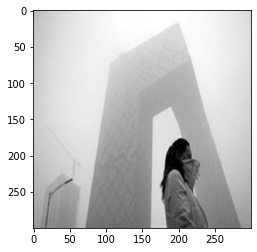

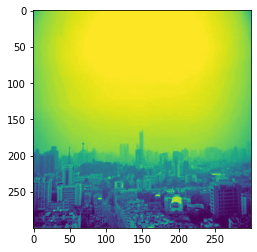

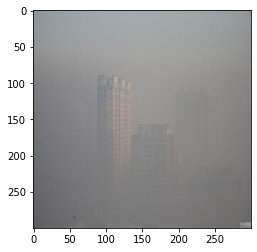

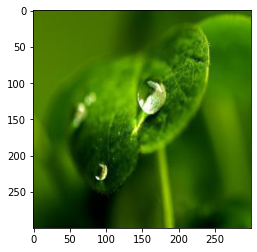

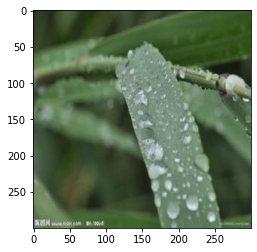

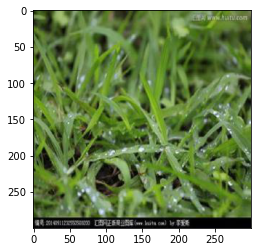

In [100]:
# raffiguration of the first two folders
## DONT RUN THIS CODE 
## BECASUE THE IMAGE ARE RESCALE FROM  FLOW_FROM_DIRECTROY 


import matplotlib.pyplot as plt
import matplotlib.image as nimage
import PIL 
from PIL import Image



for i in list_fogsmog[:3]:
  path  = os.path.join(fogsmog_dir, i)
  read_image_path = nimage.imread(path)
  plt.imshow(read_image_path)
  plt.show()

for i in list_dew[:3]:
  path  = os.path.join(dew_dir, i)
  read_image_path = nimage.imread(path)
  plt.imshow(read_image_path)
  plt.show()
# show before resize the images 






# resize the images

for folder in list_dir:

   c_folder = os.path.join(base_dir, folder)

   for image in os.listdir(c_folder):
     try:
        f_img = c_folder + "/" + image
        img  = Image.open(f_img)
        rgb_im = img.convert('RGB')
        img = img.resize((300,300))
        img.save(f_img)
     except:
       f_img = c_folder + "/" + image
       os.remove(f_img)
       continue


    


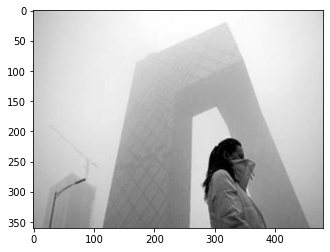

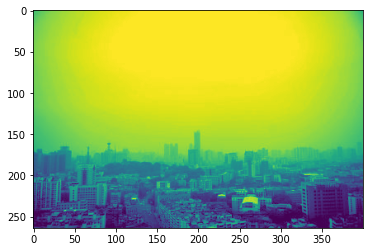

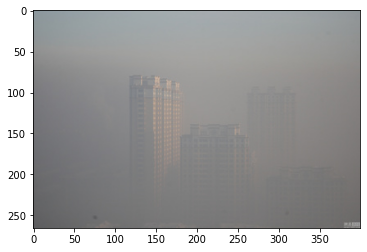

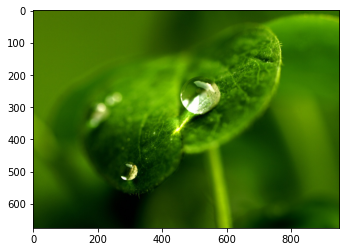

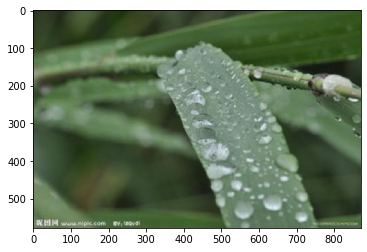

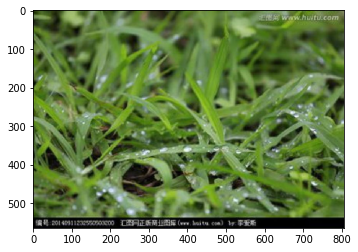

['2208.jpg', '2209.jpg', '2210.jpg', '2211.jpg', '2212.jpg', '2213.jpg', '2214.jpg', '2215.jpg', '2216.jpg', '2217.jpg']


In [109]:

for i in list_fogsmog[:3]:
  path  = os.path.join(fogsmog_dir, i)
  read_image_path = nimage.imread(path)
  plt.imshow(read_image_path)
  plt.show()

for i in list_dew[:3]:
  path  = os.path.join(dew_dir, i)
  read_image_path = nimage.imread(path)
  plt.imshow(read_image_path)
  plt.show()

print(list_dew[:10])

In [48]:
print(n_type)

11


In [110]:
# create the model  
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation = "relu", input_shape = (300, 300,3) ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3),activation = "relu"),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(n_type, activation = "softmax"),
])

# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [111]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale = 1./255)

train_generator = train_gen.flow_from_directory(base_dir, 
                                                target_size = (300, 300),
                                                batch_size = 126,
                                                class_mode = "categorical",
                                                shuffle = True
                                                )




Found 6862 images belonging to 11 classes.


In [112]:
model.fit(train_generator,steps_per_epoch = 20,  epochs = 5)


Epoch 1/5
20/20 [==============================] - 415s 20s/step - loss: 10.7228 - accuracy: 0.1631
Epoch 2/5
20/20 [==============================] - 405s 20s/step - loss: 2.2234 - accuracy: 0.2141
Epoch 3/5
20/20 [==============================] - 401s 20s/step - loss: 2.2679 - accuracy: 0.3456
Epoch 4/5
20/20 [==============================] - 395s 20s/step - loss: 2.0159 - accuracy: 0.3782
Epoch 5/5
20/20 [==============================] - 385s 19s/step - loss: 1.8900 - accuracy: 0.4282


In [113]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)